# KMeans- Demo zum Clustern von Bildern
## Quellen:
https://github.com/gkabbe/Python-Kurs2015/wiki/5---Numpy Grundlagen Numpy

https://mubaris.com/posts/kmeans-clustering/  Berechnet den Massenmittelpunkt 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


class k_Means():
    def __init__(self,puLi=[],clLi=[]):
        self.puLi=np.array(puLi) # die zu clusternden Punkte       
        self.clLi=np.array(clLi) # die Clusterpunkte
        self.anzahl=len(self.puLi) 
        self.k = len(self.clLi)
        self.cluster= np.zeros((len(puLi),),dtype=int) 
        self.abstaende = np.zeros((len(clLi),))
        self.error = 20
        self.cls=[]
        
    def einteilen(self):        
        for i in range(self.anzahl):
            #print("Abstaende: ",self.clLi,self.puLi[i])
            abstand=np.linalg.norm(self.clLi-self.puLi[i],axis=1)
            #print(abstand)
            cluster = np.argmin(abstand)
            #print(cluster)
            self.cluster[i]=cluster
        #print(self.cluster)
        self.clLi_old=np.copy(self.clLi)
        self.cls.append(self.clLi_old)
        for i in range(self.k):            
            punkte= [self.puLi[j] for j in range(self.anzahl) if self.cluster[j]==i]            
            if len(punkte)>0:    #bei Zufallspunkten eventuell sinnvoll            
                self.clLi[i]=np.mean(punkte,axis =0)
        print("Neue Cluster: \n", self.clLi)
        self.error = np.linalg.norm(self.clLi-self.clLi_old)
        print("Fehler: ",self.error)
        
    def cluster2Bild(self):
        #liefert ein Bild mit den Farben der Clusterzentren
        bLi=''
        for c in self.cluster:
            for f in self.clLi[c]:
                bLi=bLi+str(f)+' '
        return bLi
    
    def cluster2Bild2(self,name):
        #liefert ein Bild mit den Farben der Clusterzentren
        bAr=np.copy(self.puLi)
        for i in range(self.anzahl):
            bAr[i]=self.clLi[self.cluster[i]]
        np.savetxt(name, bAr, fmt="%3d" ,delimiter=" ")
                             
    def runden(self):           
        self.einteilen()
        while self.error> 10:            
            self.einteilen()      
            
    def zeigen(self):
        fig = plt.figure()        
        ax = fig.add_subplot(111)        
        farben=["red","yellow"]
        m=["+","x","*","#"]
        for i in range(self.k):
            xs= [self.puLi[j][0] for j in range(self.anzahl) if self.cluster[j]==i]
            ys= [self.puLi[j][1] for j in range(self.anzahl) if self.cluster[j]==i]
            #print("xs: ",xs," ys: ",ys)            
            ax.scatter(xs,ys, c=farben[i])
        print("CLS: ",self.cls)
        si=-1#Markerzaehler
        for c in self.cls:
            si+=1
            for i in range(self.k):
                ax.scatter(c[i][0],c[i][1], c="black",marker=m[si])                      
        #for c in self.clLi:
            #ax.scatter(c[0],c[1], c="black",marker=m[0])
        plt.axis([0, 15, 0, 15])
        plt.show()
               

def erstelleZufallsCluster(anz,dim,mini,maxi):
    cl=[]
    for i in range(anz):
        c=[]
        for j in range(dim):
            x=random.randint(mini,maxi)
            c.append(x)
        cl.append(c)
    return cl


[[1, 5], [12, 9]]
Neue Cluster: 
 [[ 4  7]
 [11  8]]
Fehler:  3.872983346207417
CLS:  [array([[ 1,  5],
       [12,  9]])]


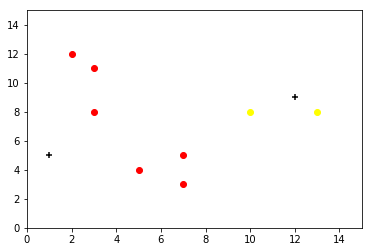

Neue Cluster: 
 [[ 4  7]
 [11  8]]
Fehler:  0.0
CLS:  [array([[ 1,  5],
       [12,  9]]), array([[ 4,  7],
       [11,  8]])]


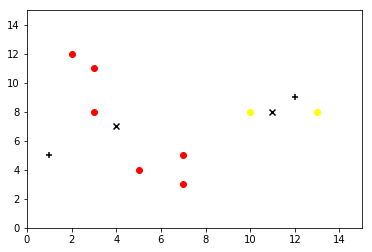

In [2]:
punktliste= [[2,12],[3,11],[3,8],[5,4],[7,5],[7,3],[10,8],[13,8]]
#Beispielwerte zum Testen
def test():
    cl=erstelleZufallsCluster(2,2,1,12)
    print (cl)
    k=k_Means(punktliste,cl)#listeClusterPunkte)
    while k.error>0:
        k.einteilen()
        k.zeigen()

test()

In [3]:
datei="cover.ppm"

f = open (datei,"r")
inhalt= f.readlines()
kopf=inhalt[:4]
bild=inhalt[4:]
bli=[]
for z in bild:
    pl = z.strip().split(" ")
    bli+=pl
pili=[]
for i  in range(0,len( bli),3):
    r= int(bli[i])
    g= int(bli[i+1])
    b= int(bli[i+2])
    pili.append([r,g,b])
#print(pili[:3])
piArray=np.array(pili)#Startwerte des Bildes speichern


def erstelleZufallsZentren(anz,dim=3,zmin=1,zmax=255):
    #liefert eine Liste aus anz Liste mit je dim Elementen
    li=[]
    for i in range(anz):
        z=[]
        for j in range(dim):
            z.append(random.randint(zmin,zmax))
        li.append(z)
    return li



anzahlFarben= 5
clLi=erstelleZufallsZentren(anzahlFarben)
clAr= np.array(clLi)
print(clAr,clAr.ndim,clAr.shape)





#Clustern
k=k_Means(pili,clLi)
#k.einteilen()
#print( k.clLi)
ausgabe=datei[:-4]+"_ausgabe.ppm"
k.runden()
k.cluster2Bild2(ausgabe)

f=open(ausgabe,"r")
txt=f.read()

k=""
for z in kopf:
    k+=z
txt=k+txt
f=open(ausgabe,"w")
f.write(txt)
f.close()



[[196  88 248]
 [208 199 203]
 [173  16 234]
 [229 200  92]
 [ 54 173 248]] 2 (5, 3)
Neue Cluster: 
 [[180  86 149]
 [111 241 139]
 [ 93  12  59]
 [180 148  47]
 [ 12  75 183]]
Fehler:  291.7087588674704
Neue Cluster: 
 [[227  20 113]
 [ 96 232 124]
 [ 71  18  30]
 [217 158  18]
 [  6  54 189]]
Fehler:  112.1427661510095
Neue Cluster: 
 [[216  16  84]
 [ 95 228 122]
 [ 40  22  26]
 [228 175  13]
 [  6  53 190]]
Fehler:  49.28488612140643
Neue Cluster: 
 [[207  18  77]
 [ 95 228 121]
 [ 28  22  25]
 [233 185   9]
 [  6  54 191]]
Fehler:  20.566963801203133
Neue Cluster: 
 [[204  20  74]
 [ 95 227 121]
 [ 25  22  25]
 [235 190   8]
 [  6  54 191]]
Fehler:  7.874007874011811
